In [4]:
!adb forward tcp:9999 tcp:9999

In [8]:
def sensor(n):
    print("-" * 10 + "start %d sensor" % n + "-" * 10)
    droid = android.Android()
    ret = droid.startSensingTimed(n, 100)
    if ret.error:
        if "your OS version..." in ret.error:
            return True
        return False

    for i in range(n_loop):
        tn = tb = time.time()
        while tn - tb < timeout:
            events = droid.eventPoll(1).result
            tn = time.time()
            if events:
                break
            time.sleep(1)
        else:
            print("time out...")
            continue
        evsensor = []
        for ev in events:
            if ev["name"] != "sensors":
                continue
            evsensor.append(ev)
        if not evsensor:
            continue
        for ev in evsensor:
            print(time.time(), end="")
            print(":", end="")
            print(ev["data"])
    droid.stopSensing()
    return False

SyntaxError: invalid syntax (<ipython-input-8-6af5e1f0dd7c>, line 29)

In [2]:
%matplotlib inline
import time 
import android
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys, os,re
droide=android.Android()

In [9]:
import android, time
droid = android.Android()
droid.startSensingTimed(1, 250)
time.sleep(1)
s1 = droid.readSensors().result
s2 = droid.sensorsGetAccuracy().result
s3 = droid.sensorsGetLight().result
s4 = droid.sensorsReadAccelerometer().result
s5 = droid.sensorsReadMagnetometer().result
s6 = droid.sensorsReadOrientation().result
droid.stopSensing()
print s2,s3,s4,s5

3 9 [0.10474633, -0.16998832, 10.17416] [-5.88, -15.205, -26.721]


In [15]:
droide.startSensingTimed(1, 1000)
s3 = droide.sensorsGetLight().result
droide.stopSensing()
print s3

None


In [9]:
delay = droide.dialogGetInput('Entrada 1', 'Demora antes de iniciar?','2').result
numofShots = droide.dialogGetInput('Entrada 2','Total de imagenes a capturar?','20').result
delayBetweenShots = droide.dialogGetInput('Entrada 3','Demora (segs) entre capturas?','1').result

In [2]:

delay=2
numofShots = 20
delayBetweenShots=1
droide.ttsSpeak('Tomando fotos en ' + str(delay) + ' segundos')
time.sleep(int(delay))
counter =1
droide.ttsSpeak('Tomando foto')

while counter <= int(numofShots):
    droide.cameraCapturePicture('/sdcard/DCIM/CAMERA/pruebas/fotosP_'+ str(counter)+ '_.jpg',1,1)
    counter +=1
    #if counter != int(numofShots):
    #    time.sleep(int(delayBetweenShots))
print 'Hecho sin errores ...'

droide.ttsSpeak('Terminando sin errores ...')
del droide


Hecho sin errores ...


In [3]:
!adb pull /sdcard/DCIM/CAMERA/pruebas ./pruebas

pull: building file list...
pull: /sdcard/DCIM/CAMERA/pruebas/fotosP_20_.jpg -> ./pruebas/fotosP_20_.jpg
pull: /sdcard/DCIM/CAMERA/pruebas/fotosP_19_.jpg -> ./pruebas/fotosP_19_.jpg
pull: /sdcard/DCIM/CAMERA/pruebas/fotosP_18_.jpg -> ./pruebas/fotosP_18_.jpg
pull: /sdcard/DCIM/CAMERA/pruebas/fotosP_17_.jpg -> ./pruebas/fotosP_17_.jpg
pull: /sdcard/DCIM/CAMERA/pruebas/fotosP_16_.jpg -> ./pruebas/fotosP_16_.jpg
pull: /sdcard/DCIM/CAMERA/pruebas/fotosP_15_.jpg -> ./pruebas/fotosP_15_.jpg
pull: /sdcard/DCIM/CAMERA/pruebas/fotosP_14_.jpg -> ./pruebas/fotosP_14_.jpg
pull: /sdcard/DCIM/CAMERA/pruebas/fotosP_13_.jpg -> ./pruebas/fotosP_13_.jpg
pull: /sdcard/DCIM/CAMERA/pruebas/fotosP_12_.jpg -> ./pruebas/fotosP_12_.jpg
pull: /sdcard/DCIM/CAMERA/pruebas/fotosP_11_.jpg -> ./pruebas/fotosP_11_.jpg
pull: /sdcard/DCIM/CAMERA/pruebas/fotosP_10_.jpg -> ./pruebas/fotosP_10_.jpg
pull: /sdcard/DCIM/CAMERA/pruebas/fotosP_9_.jpg -> ./pruebas/fotosP_9_.jpg
pull: /sdcard/DCIM/CAMERA/pruebas/fotosP_8_.jpg ->

Encontramos 2 faces!


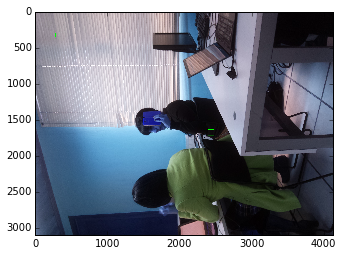

In [8]:
pic = os.path.join('.', 'carota.jpg')
img = cv2.imread(pic)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(img)

caras_cascada = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
caras = caras_cascada.detectMultiScale(gray,1.3,3)

print "Encontramos {0} faces!".format(len(caras))

i= img.copy()

for(x,y,w,h) in caras:
    cv2.rectangle(i,(x,y), (x+w,y+h), (0,255,0),2)
plt.imshow(i)

None
113.932424769


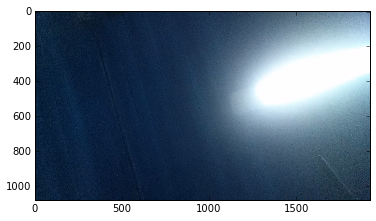

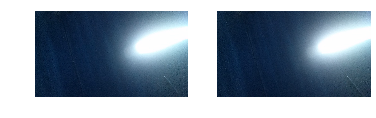

403.795203993


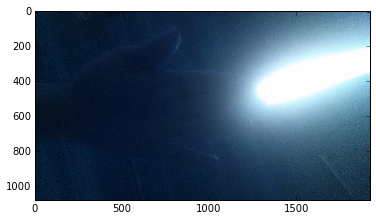

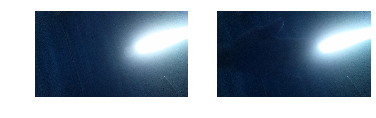

java.lang.RuntimeException: No dialog to show.
708.505747492


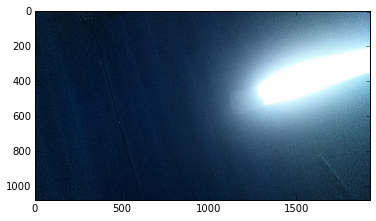

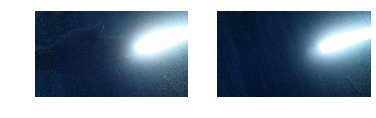

java.lang.RuntimeException: No dialog to show.
376.138844522


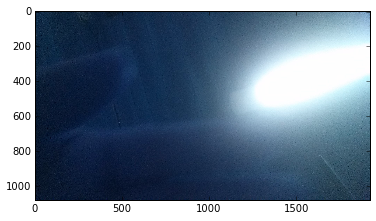

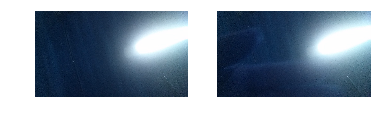

java.lang.RuntimeException: No dialog to show.
5914.84404032


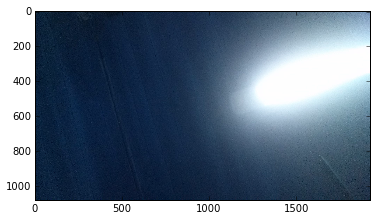

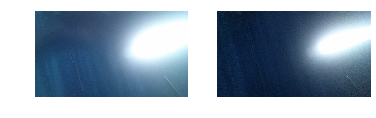

5285.42560957


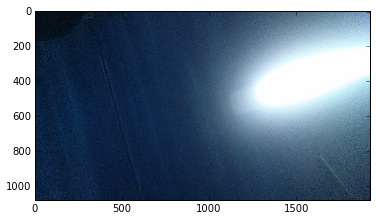

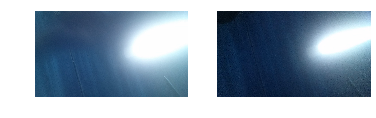

8003.23796248


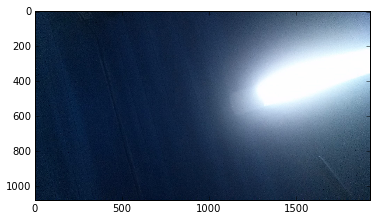

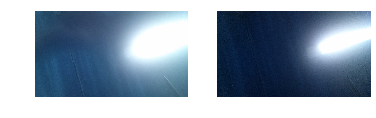

5217.48100357


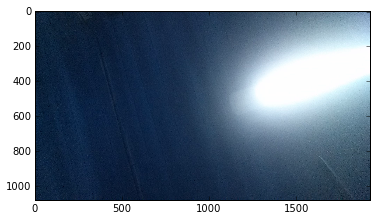

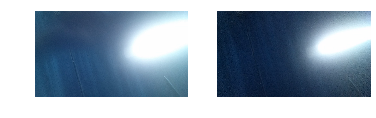

5614.58217641


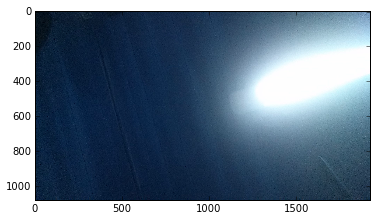

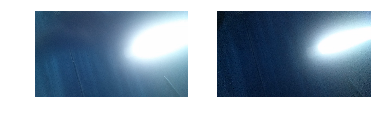

5501.04856337


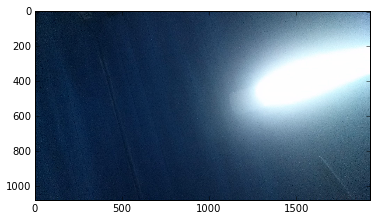

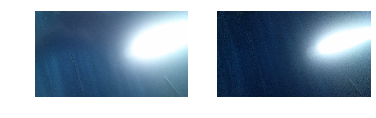

java.lang.RuntimeException: No dialog to show.
1154.54173129


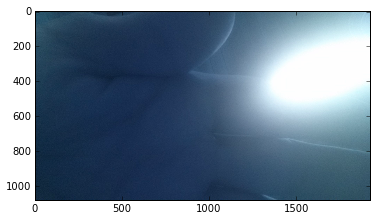

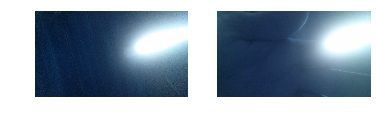

java.lang.RuntimeException: No dialog to show.
4497.56389902


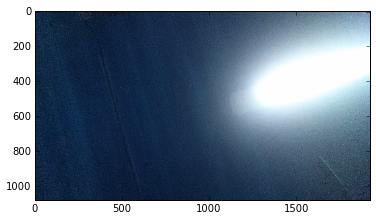

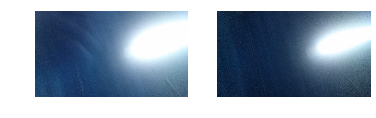

java.lang.RuntimeException: No dialog to show.
21195.6059057


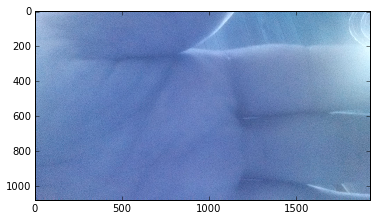

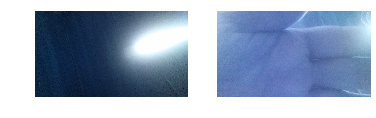

java.lang.RuntimeException: No dialog to show.
9143.06550106


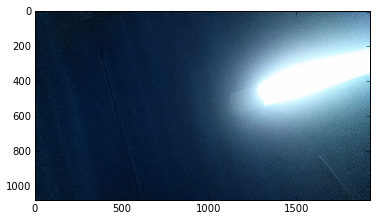

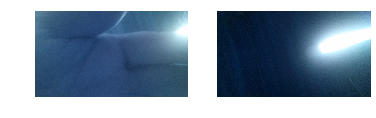

java.lang.RuntimeException: No dialog to show.
131.232205343


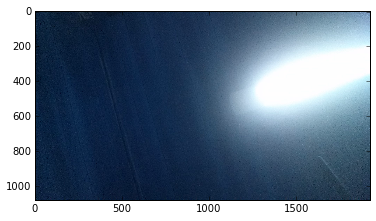

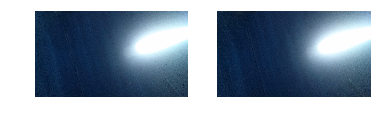

Hecho sin errores ...


In [6]:

%matplotlib inline
import time 
import android
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys, os,re



def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
 
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	print  str(m)
	# s = ssim(imageA, imageB)
 
	# setup the figure
	fig = plt.figure(title)
	#plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the images
	plt.show()
	return m



def revisar():
	droide=android.Android()
	counter=1
	delay=5
	numofShots = 5
	delayBetweenShots=8
	couterDecteccion=1
	droide.ttsSpeak('Tomando fotos')
	time.sleep(int(1))
	droide.dialogCreateAlert('Seleccione','Detener?')
	droide.dialogSetPositiveButtonText('Si')
	droide.dialogSetNegativeButtonText('No')
	droide.dialogShow()
	s3 = droide.sensorsGetLight()
	print  s3[1]
	response = droide.dialogGetResponse().result
	while response['which']=='negative': 
		droide.ttsSpeak('Tomando foto 1')
		droide.cameraCapturePicture('/sdcard/DCIM/CAMERA/programa/foto_'+ str(couterDecteccion)+ '_.jpg',1,1)
		os.system('adb pull /sdcard/DCIM/CAMERA/programa/foto_'+ str(couterDecteccion)+ '_.jpg')
		pic = os.path.join('.','foto_'+  str(couterDecteccion)+ "_.jpg")
		img1 = cv2.imread(pic)
		couterDecteccion +=1
		time.sleep(int(delayBetweenShots))
		droide.ttsSpeak('Tomando foto 2')
		droide.cameraCapturePicture('/sdcard/DCIM/CAMERA/programa/foto_'+ str(couterDecteccion)+ '_.jpg',1,1)
		os.system('adb pull /sdcard/DCIM/CAMERA/programa/foto_'+ str(couterDecteccion)+ '_.jpg')
		pic = os.path.join('.','foto_'+  str(couterDecteccion)+ "_.jpg")
		couterDecteccion +=1
		img2 =  cv2.imread(pic)
		plt.imshow(img1)
		plt.imshow(img2)
		i= img1.copy()
		i2=img2.copy()
		diferente = compare_images(i,i2,'pruebacompare')
		if diferente >1000:
			droide.ttsSpeak('Imagen con cambio')
			while counter <= int(numofShots):
				droide.ttsSpeak('Tomando foto carrete '+ str(counter))
				droide.cameraCapturePicture('/sdcard/DCIM/CAMERA/programa/fotoC_'+ str(counter)+ '_.jpg',1,1)
				os.system('adb pull /sdcard/DCIM/CAMERA/programa/fotoC_'+ str(counter)+ '_.jpg')
				pic = os.path.join('.','fotoC_'+  str(counter)+ "_.jpg")
				counter +=1
				img2 =  cv2.imread(pic)
				plt.imshow(img1)
				plt.imshow(img2)
				i= img1.copy()
				i2=img2.copy()
				diferente =compare_images(i,i2,'pruebacompare')
				if diferente <1000:
					droide.ttsSpeak('Imagen parecida')
					break
				time.sleep(int(1))
		if response['which']=='negative':
			droide.dialogShow()
			response = droide.dialogGetResponse().result
	print 'Hecho sin errores ...'
	del droide    
    
revisar()
    

In [ ]:
!adb pull /sdcard/DCIM/CAMERA/pruebas/ ./pruebas

In [21]:
droide=android.Android()
droide.startSensingTimed(1, 250)
time.sleep(1)
s1 = droide.readSensors().result
s2 = droide.sensorsGetAccuracy().result
s3 = droide.sensorsGetLight().result
s4 = droide.sensorsReadAccelerometer().result
s5 = droide.sensorsReadMagnetometer().result
s6 = droide.sensorsReadOrientation().result
droide.stopSensing()

print s3

6


In [28]:
droide.getLaunchableApplications().result

{u'Anclaje': u'mx.lania.anclaje.AnclajeMainActivity',
 u'Android Sensing Playground': u'root.gast.playground.GastAppActivity',
 u'AntiVirus': u'com.antivirus.ui.main.AntivirusMainScreen',
 u'AudioRecordText': u'mx.lania.audiorecordtext.MainActivity',
 u'Ayuda': u'com.samsung.helphub.HelpHubActivity',
 u'BasicViews6': u'mx.lania.basicviews6.MainActivity',
 u'BtNotification': u'com.rwatch.Launcher1.SplashActivity',
 u'B\xfasqueda por voz': u'com.google.android.googlequicksearchbox.VoiceSearchActivity',
 u'Calculadora': u'com.sec.android.app.popupcalculator.Calculator',
 u'Calendario': u'com.android.calendar.AllInOneActivity',
 u'ChatON': u'com.sec.chaton.HomeActivity',
 u'Chrome': u'com.google.android.apps.chrome.Main',
 u'Colonies vs Empire': u'com.kulfun.cve.Main',
 u'Config.': u'com.android.settings.SettingsTabActivity',
 u'Config. de Google': u'com.google.android.gms.app.settings.GoogleSettingsActivity',
 u'Contactos': u'com.android.contacts.activities.PeopleActivity',
 u'Correo': u'